In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import netCDF4 as nc
import xie_liu as XL

In [225]:
test_path = "dados/maoradflux1long/maoradflux1longM1.c2.20131223.040000.nc"
dataset = nc.Dataset(test_path, "r")
dataset.variables.keys()

odict_keys(['base_time', 'time_offset', 'time', 'time_bounds', 'downwelling_shortwave', 'source_downwelling_shortwave', 'qc_downwelling_shortwave', 'clearsky_downwelling_shortwave', 'downwelling_longwave', 'qc_downwelling_longwave', 'clearsky_downwelling_longwave', 'upwelling_shortwave', 'qc_upwelling_shortwave', 'clearsky_upwelling_shortwave', 'upwelling_longwave', 'qc_upwelling_longwave', 'clearsky_upwelling_longwave', 'diffuse_downwelling_shortwave', 'source_diffuse_downwelling_shortwave', 'qc_diffuse_downwelling_shortwave', 'clearsky_diffuse_downwelling_shortwave', 'direct_downwelling_shortwave', 'source_direct_downwelling_shortwave', 'qc_direct_downwelling_shortwave', 'clearsky_direct_downwelling_shortwave', 'clearsky_status', 'cloudfraction_longwave', 'cloudfraction_shortwave', 'cloudfraction_shortwave_status', 'visible_cloud_optical_depth', 'brightness_temperature', 'cloud_radiating_temperature', 'clearsky_emissivity_longwave', 'cosine_zenith', 'cloud_transmissivity_shortwave', 

In [248]:
    path = test_path
    dataset = nc.Dataset(path, "r")
    base_time = dataset["base_time"][0]
    time_offset = dataset["time_offset"][:]
    Fdn_clr = dataset["clearsky_downwelling_shortwave"][:]
    Fdn_all = dataset["downwelling_shortwave"][:]
    Fup_all = dataset["upwelling_shortwave"][:]
    Fdn_clr_d = dataset["clearsky_direct_downwelling_shortwave"][:]
    Fdn_all_d = dataset["direct_downwelling_shortwave"][:]
    rad_cf_short = dataset["cloudfraction_shortwave"][:]
    rad_cf_long = dataset["cloudfraction_longwave"][:]
    rad_cf_short_status = dataset["cloudfraction_shortwave_status"][:]
    cf2 = dataset["cloudfraction_longwave"][:]
    cf3 = dataset["cloudfraction_shortwave"][:]
    T = dataset["cloud_transmissivity_shortwave"][:]
    solar_zen_cosine = dataset["cosine_zenith"][:]

In [249]:
(B1, B2) = XL.get_B(Fdn_clr, Fdn_all, Fup_all, Fdn_clr_d, Fdn_all_d, T)

In [250]:
len(cf2[cf2 == cf3]) / len(cf2)

0.17847222222222223

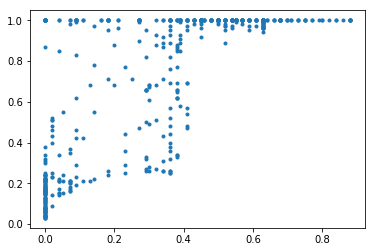

In [255]:
plt.plot(cf2, cf3, '.')
plt.show()

In [197]:
Fdn_clr_d[464]

277.29999

In [198]:
np.argwhere(B2 > 1)

array([[464],
       [465],
       [679],
       [695],
       [696],
       [702],
       [703],
       [909]])

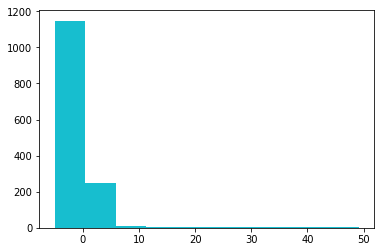

In [199]:
plt.hist(B1)
plt.show()

In [200]:
T = dataset["cloud_transmissivity_shortwave"][:]

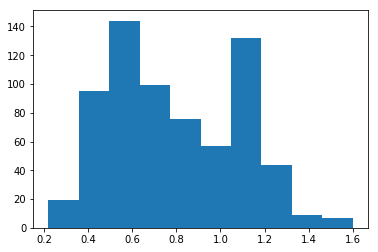

In [201]:
T = T[T > -1]
plt.hist(T)
plt.show()

In [202]:
len(T[T > 1]) / len(T)

0.3181818181818182

In [203]:
dataset["cloud_transmissivity_shortwave"]

<class 'netCDF4._netCDF4.Variable'>
float32 cloud_transmissivity_shortwave(time)
    long_name: Shortwave cloud transmissivity
    units: unitless
    comment: calculated as ratio of downwelling_shortwave to clearsky_downwelling_shortwave
    missing_value: -9999.0
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1440,)
filling off

In [274]:
raw = pd.read_csv("CF-XL.csv")
raw.XL_CloudFraction = pd.to_numeric(raw.XL_CloudFraction, errors="coerce")
#raw = raw[~np.isnan(raw.XL_CloudFraction)]
raw.Longwave_CloudFraction = pd.to_numeric(raw.Longwave_CloudFraction, errors="coerce")
raw.Shortwave_CloudFraction = pd.to_numeric(raw.Shortwave_CloudFraction, errors="coerce")

In [276]:
cf_long = raw.Longwave_CloudFraction
cf_short = raw.Shortwave_CloudFraction
len(cf_long[cf_long == cf_short]) / len(raw)

0.034755571249215314

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


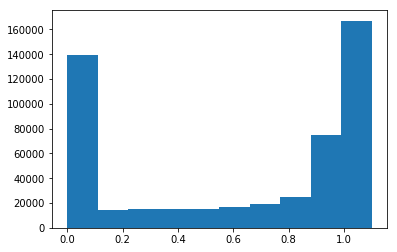

In [277]:
plt.hist(raw.XL_CloudFraction, range=(0, 1.1))
plt.show()

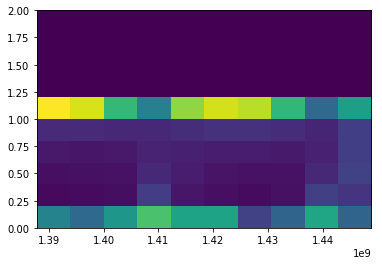

In [278]:
cf = raw.XL_CloudFractionCorrected
inds = (~np.isnan(cf)) & (~np.isinf(cf)) & (cf < 2)
t = raw.Time[inds]
cf = cf[inds]
plt.hist2d(x=t, y=cf)
plt.show()

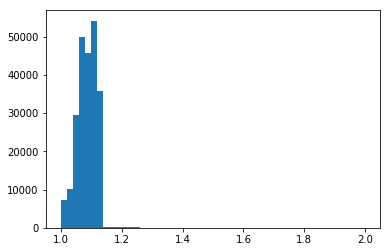

In [279]:
plt.hist(cf, range=(1, 2), bins=50)
plt.show()

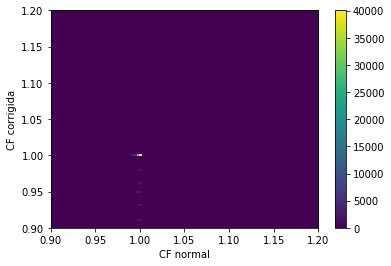

In [295]:
cf1 = raw.XL_CloudFraction
cf2 = raw.Longwave_CloudFraction
inds = (cf1 < 1.2) & (cf2 < 1.2) & (~np.isinf(cf1)) & (~np.isinf(cf2)) & (cf1 > 0) & (cf2 > 0)
cf1 = cf1[inds]
cf2 = cf2[inds]
plt.hist2d(cf1, cf2, normed=True, bins=100, range=((0.9, 1.2), (0.9, 1.2)))
plt.xlabel("CF normal")
plt.ylabel("CF corrigida")
plt.colorbar()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


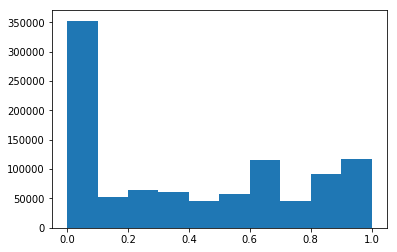

In [296]:
cf2 = raw.Longwave_CloudFraction
cf3 = raw.Shortwave_CloudFraction

plt.hist(cf2, range=(0, 1))
plt.show()

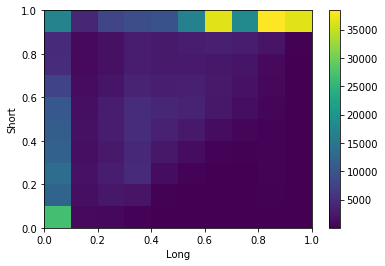

In [297]:
inds = (~np.isnan(cf2)) & (~np.isnan(cf3))
cf2 = cf2[inds]
cf3 = cf3[inds]

plt.hist2d(x=cf2, y=cf3, bins=10)
plt.xlabel("Long")
plt.ylabel("Short")
plt.colorbar()
plt.show()

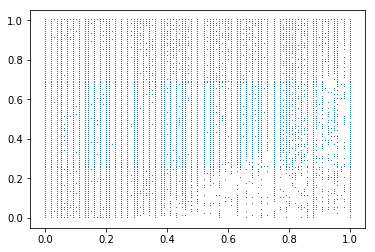

In [285]:
plt.plot(cf2, cf3, ',')
plt.show()

In [265]:
len(cf2[cf2 == cf3]) / len(cf2)

1.0